In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [9]:
low_encoder_df = pd.read_pickle("/work/aistwal/MMDS_MasterThesis/data/encoder_data/low_conv_autoencoder_200_50.pkl")

In [10]:
low_encoder_df

,Label,Encoder Output
0,bus,"[47.757042, 41.060787, 47.57038, 45.60024, 32...."
1,bus,"[47.757042, 41.060787, 47.57038, 45.60024, 32...."
2,bus,"[47.757042, 41.060787, 47.57038, 45.60024, 32...."
3,bus,"[47.757042, 41.060787, 47.57038, 45.60024, 32...."
4,bus,"[47.757042, 41.060787, 47.57038, 45.60024, 32...."
...,...,...
2995,tubestation,"[93.79161, 123.100945, 125.593185, 130.39409, ..."
2996,tubestation,"[93.79161, 123.100945, 125.593185, 130.39409, ..."
2997,tubestation,"[93.79161, 123.100945, 125.593185, 130.39409, ..."
2998,tubestation,"[93.79161, 123.100945, 125.593185, 130.39409, ..."


In [12]:
labels = low_encoder_df["Label"]
labels

0               bus
1               bus
2               bus
3               bus
4               bus
           ...     
2995    tubestation
2996    tubestation
2997    tubestation
2998    tubestation
2999    tubestation
Name: Label, Length: 3000, dtype: object

In [13]:
from matplotlib import colormaps

'''
matplotlib.colormaps: Container for colormaps that are known to Matplotlib by name.
'''
label_unique = np.unique(labels)
color_map = colormaps["tab10"]
# color_map = colormaps('tab10', len(label_unique))  # 'viridis' is just one option for a colormap
label_to_color = {key: color_map(i) for i, key in enumerate(label_unique)}

In [29]:
# Map labels to colors
colors = labels.map(label_to_color)
np.unique(colors)

array([(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0),
       (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
       (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
       (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
       (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
       (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
       (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
       (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
       (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
       (1.0, 0.4980392156862745, 0.054901960784313725, 1.0)], dtype=object)

In [15]:
low_encoder_df['Encoder Output'].values

array([array([ 47.757042,  41.060787,  47.57038 , ...,  69.27311 , 124.11575 ,
              124.08897 ], dtype=float32)                                     ,
       array([ 47.757042,  41.060787,  47.57038 , ..., 549.92554 , 579.46234 ,
              258.75595 ], dtype=float32)                                     ,
       array([ 47.757042,  41.060787,  47.57038 , ..., 549.92554 , 579.4623  ,
              247.29228 ], dtype=float32)                                     ,
       ...,
       array([ 93.79161 , 123.100945, 125.593185, ..., 604.0469  , 609.57605 ,
              268.07083 ], dtype=float32)                                     ,
       array([ 93.79161 , 123.100945, 125.593185, ..., 604.548   , 614.04584 ,
              268.32773 ], dtype=float32)                                     ,
       array([ 93.79161 , 123.100945, 125.593185, ..., 603.2179  , 611.5887  ,
              272.42776 ], dtype=float32)                                     ],
      dtype=object)

In [17]:
# Convert DataFrame column with lists into a numpy matrix for t-SNE
data_matrix = np.stack(low_encoder_df['Encoder Output'].values)

In [18]:
data_matrix.shape

(3000, 120320)

In [19]:
tsne = TSNE(n_components=2, perplexity=300, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(data_matrix)

In [20]:
tsne_results.shape

(3000, 2)

In [84]:
tsne_results

array([[ 11.514526 ,  -1.3486731],
       [ 11.425368 ,  -1.4503601],
       [ 10.622494 ,  -0.4448497],
       ...,
       [-10.042767 ,  11.722961 ],
       [-10.273793 ,  11.741382 ],
       [-10.383226 ,  11.958779 ]], dtype=float32)

In [21]:
tsne_results

array([[12.548306  ,  0.7189749 ],
       [12.413883  ,  1.0748341 ],
       [11.688382  , -0.44980302],
       ...,
       [-6.8957872 , -4.505847  ],
       [-6.955922  , -4.3227844 ],
       [-6.9813046 , -4.0248985 ]], dtype=float32)

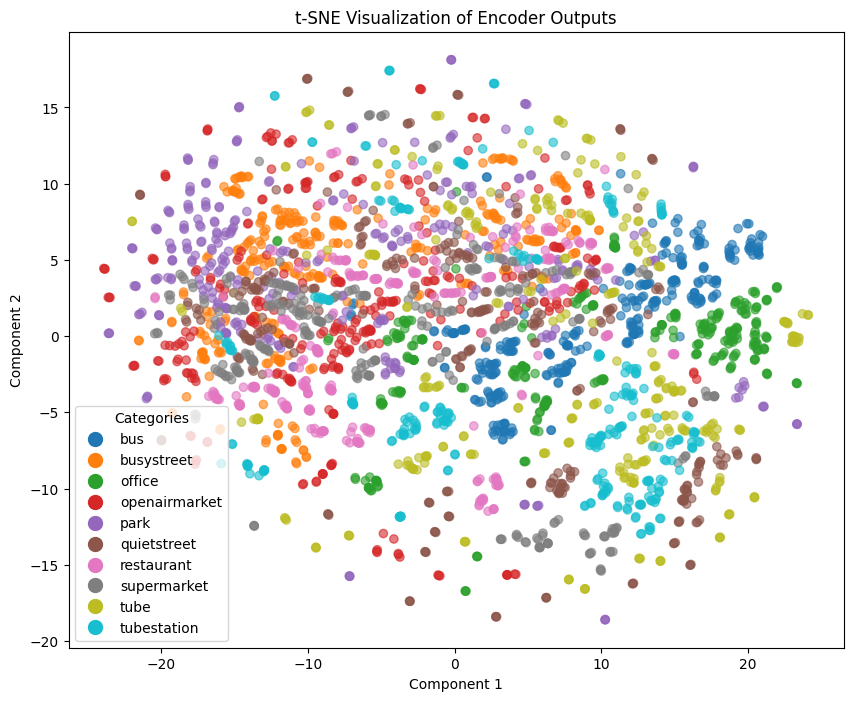

In [31]:
# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors, alpha=0.6)
plt.title('t-SNE Visualization of Encoder Outputs')

plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color=color_map(i), linestyle='', markersize=10, label=label)
           for i, label in enumerate(label_unique)]
plt.legend(handles=handles, title="Categories", title_fontsize='10', fontsize='10', loc='best')
plt.show()

In [32]:
label_unique

array(['bus', 'busystreet', 'office', 'openairmarket', 'park',
       'quietstreet', 'restaurant', 'supermarket', 'tube', 'tubestation'],
      dtype=object)

## KMEANS ON TSNE Data

In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(tsne_results)



In [34]:
cluster_indices = np.where(clusters == 7)[0]
cluster_tsne_data = encoder_df.iloc[cluster_indices]

In [35]:
np.unique(cluster_tsne_data["Label"])

array(['office', 'openairmarket', 'park', 'quietstreet', 'restaurant',
       'supermarket', 'tube', 'tubestation'], dtype=object)

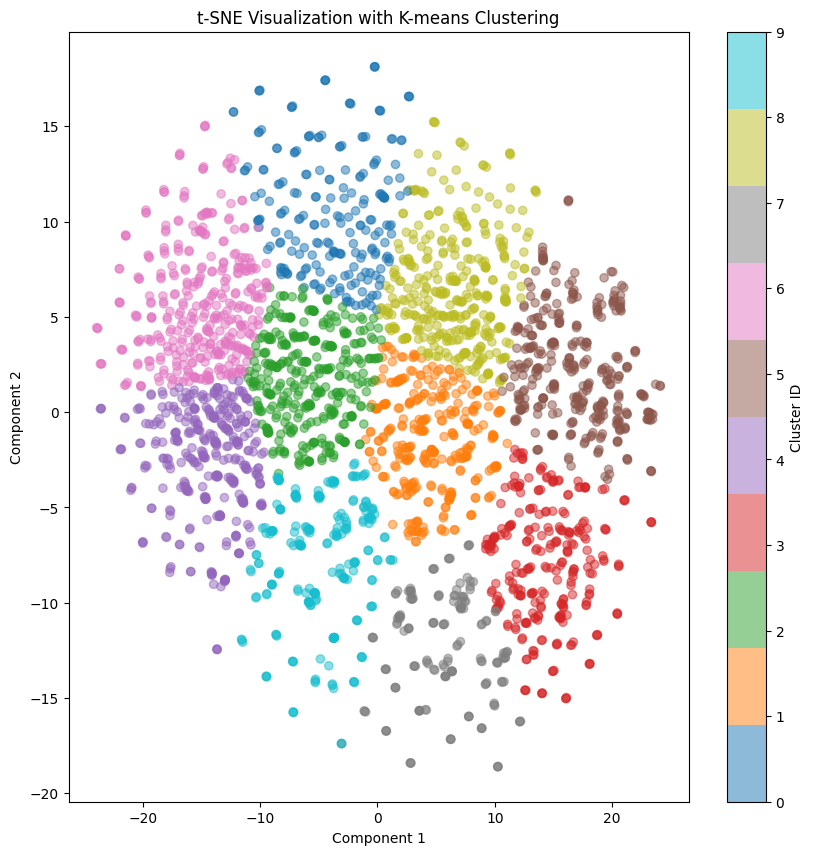

In [36]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters, cmap='tab10', alpha=0.5)
plt.title('t-SNE Visualization with K-means Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Cluster ID')
plt.show()